In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1: Data Cleaning and Preparation
**Step 1:** Load the Dataset into a DataFrame
We'll begin by loading the dataset into a Pandas DataFrame.

In [ ]:
cd = pd.read_csv('/content/sample_data/Cardiotocographic[1].csv')
cd

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [ ]:
#gives a summary of the data
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [ ]:
type(cd)
cd.shape

(2126, 14)

**Step 2: Handle Missing Values**
Next, we'll check for missing values in the dataset and decide on an appropriate method to handle them, such as imputation or deletion.

In [ ]:
#check for missing values
missing_values = cd.isnull().sum()
#displays the column with missing values
print(missing_values[missing_values > 0])

LB          21
AC          20
DS          21
DP          21
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


Deleting rows with missing values is a good approach, especially as the missing data constitute approximately only 1% of it. The dataset is large enough to maintain statistical power after removing those rows. This approach helps preserve the integrity of the data, as imputation might introduce biases or inaccuracies.

In [ ]:
# Remove rows with missing values
cd_cleaned = cd.dropna()

Droping the 'Width', 'Tendency' and 'NSP' column as they are of no use in the analysis and providing unnecessary data may lead to inaccurate predictions

In [ ]:
cd_cleaned2=cd_cleaned.drop(['Width','Tendency','NSP'],axis=1)

In [ ]:
# Check the shape of the cleaned dataset
print(cd_cleaned2.shape)

(2105, 11)


In [ ]:
# Display the first few rows of the cleaned dataset
print(cd_cleaned2.head())


           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  
0   2.4  
1  10.4  
2  13.4  
3  23.0  
4  19.9  


In [ ]:
missing_value2 = cd_cleaned2.isnull().sum()
missing_value2

,0
LB,0
AC,0
FM,0
UC,0
DL,0
DS,0
DP,0
ASTV,0
MSTV,0
ALTV,0


**Step 3: Identify and Correct Inconsistencies in Data Types**
We'll inspect the data types of each column to ensure they are appropriate for analysis (e.g., ensuring numerical data is stored as a numeric type).

In [ ]:
# Check data types of each column
print(cd_cleaned2.dtypes)

LB      float64
AC      float64
FM      float64
UC      float64
DL      float64
DS      float64
DP      float64
ASTV    float64
MSTV    float64
ALTV    float64
MLTV    float64
dtype: object


All data types seems to be correct, no action needed

**Step 4: Detect and Treat Outliers**
We'll use statistical techniques to detect outliers, such as using the Interquartile Range (IQR) method or visualizing with boxplots. Once identified, we can decide whether to treat or remove them.

In [ ]:
cd_cleaned2.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003202,0.009963,0.004388,0.001892,0.000003,0.000175,46.996929,1.361006,10.353647,8.284887
std,11.270154,0.004324,0.067870,0.003350,0.003348,0.000142,0.000840,18.847737,1.173164,21.282102,7.772858
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000
25%,126.000000,0.000000,0.000000,0.001838,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000
50%,133.000000,0.001631,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000
75%,140.000000,0.005650,0.002554,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000


In [ ]:
for i, column in enumerate(cd_cleaned2.columns):
  Q1 = np.quantile(cd_cleaned2[column],0.25)
  Q3 = np.quantile(cd_cleaned2[column],0.75)
  IQR = Q3 - Q1
  print(f'IQR : {column}',IQR)
  UL = Q3 + (1.5 * IQR)
  LL = Q1 - (1.5 *  IQR)
  Outliers = cd_cleaned2[(cd_cleaned2[column]< LL) | (cd_cleaned2[column] > UL)]
  print(f"Outliers for {column}:",Outliers)

IQR : LB 14.0
Outliers for LB:               LB        AC        FM        UC        DL        DS        DP  \
134    52.000000  0.001590  0.000000  0.029851  0.000000  0.000000  0.000003   
411   214.000000  0.000000  0.000000  0.001595  0.001595  0.000000  0.000000   
610   214.000000  0.002469  0.002469  0.002469  0.000000  0.000004  0.000000   
612   214.000000  0.005181  0.012953  0.002591  0.000000  0.000000  0.000000   
785    52.000000  0.000834  0.013344  0.000000  0.000000  0.000000  0.000000   
1027   51.842487  0.009485  0.000000  0.005420  0.002710  0.000005  0.000000   
1103  214.000000  0.006972  0.000000  0.002960  0.000000  0.000000  0.000000   
1406  214.000000  0.005068  0.000000  0.001689  0.000000  0.000000  0.000000   
1504  214.000000  0.006189  0.000000  0.006189  0.000000  0.000000  0.000000   
1834   52.188547  0.000000  0.001043  0.003128  0.007299  0.000000  0.000000   

           ASTV      MSTV  ALTV  MLTV  
134   58.000000  0.500000   0.0   7.9  
411   71

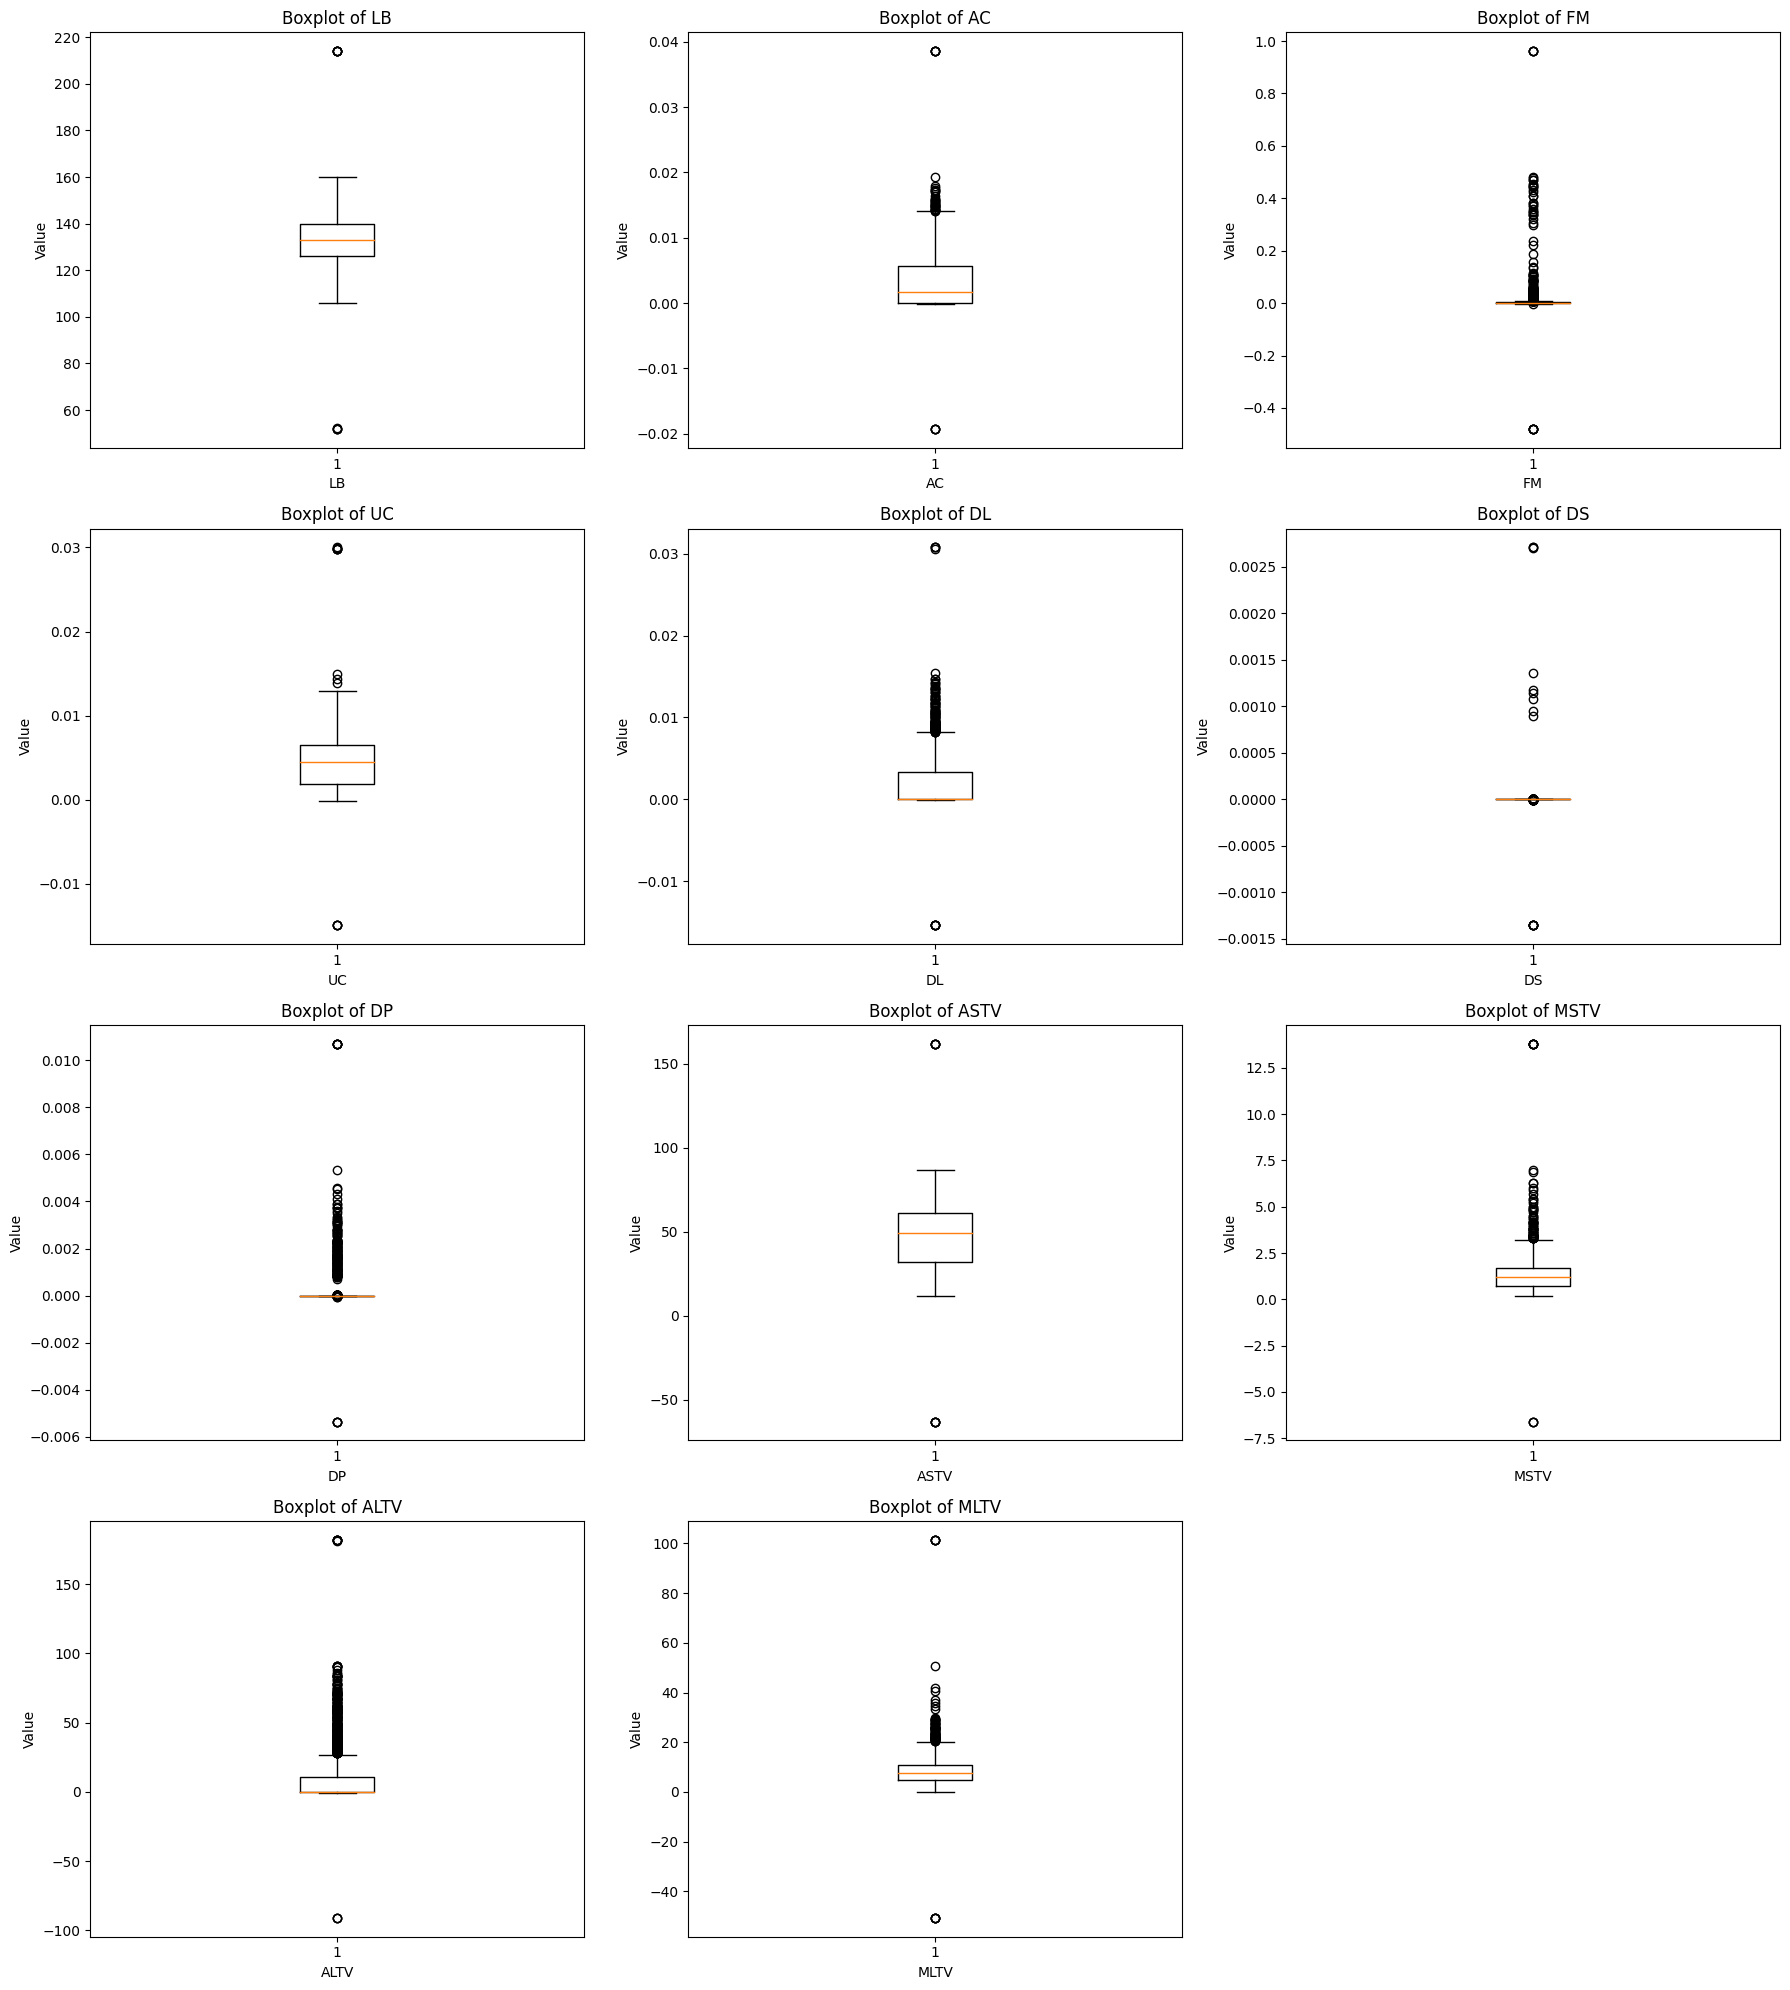

In [ ]:
# Column names in the dataset
columns = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV']

# Set up the figure
plt.figure(figsize=(18, 20))

# Loop through each column and create a boxplot
for i, col in enumerate(columns):
    # Create a subplot in a 4x3 grid
    plt.subplot(4, 3, i + 1)

    # Plot the boxplot for the current column
    plt.boxplot(cd_cleaned2[col])

    # Add title, labels, and legend
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Value')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the figure
plt.show()


From the above observation, both graphical and statistical, it could be inferred that:

1.In certain columns, such as LB, AC, UC, DS, ASTV, the outliers are few and will not significantly affect the central tendencies.

2.However, in columns like FM, DL, DP, MSTV and ALTV, much of the data constitutes an outlier.

But as the nature of the data is clinical and sensitive, the outliers can neither be removed not be tampered with, as that would significantly compromise the integrity of the dataset.

The purpose of this assignment is exploratory, that is to uncover insights, identify patterns, and understand the dataset's underlying structure and these outliers can be of special importance in this light as they could be used in uncovering certain characteristics associated with a particular diagnosis.

Hence the Outliers are left as they were.

# 2.	Statistical Summary:

In [ ]:
# Calculate basic statistical summary
summary = cd_cleaned2.describe().T  # Transpose for better readability
summary['median'] = cd_cleaned2.median()
summary['IQR'] = cd_cleaned2.quantile(0.75) - cd_cleaned2.quantile(0.25)  # Interquartile Range (IQR)

# Display the summary
print(summary[['mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max', 'IQR']]) #To arrange in proper sequence

# Highlight interesting findings
for col in cd_cleaned2.columns:
    mean = summary.loc[col, 'mean'] #locates the mean of the itirating column
    median = summary.loc[col, 'median']
    std = summary.loc[col, 'std']
    iqr = summary.loc[col, 'IQR']

    print(f"\n--- {col} ---")
    print(f"Mean: {mean:.2f}, Median: {median:.2f}")   #print upto 2 decimal plces
    print(f"Standard Deviation: {std:.2f}, IQR: {iqr:.2f}")

    # Check for skewness based on mean and median
    if mean > median:
        print(f"{col} is right-skewed (mean > median).")
    elif mean < median:
        print(f"{col} is left-skewed (mean < median).")
    else:
        print(f"{col} is symmetrically distributed (mean ≈ median).")

    # Identify high variability
    if std > (0.5 * mean):
        print(f"{col} shows high variability (std > 50% of the mean).")


            mean      median        std        min         25%         50%  \
LB    133.343598  133.000000  11.270154  51.842487  126.000000  133.000000   
AC      0.003202    0.001631   0.004324  -0.019284    0.000000    0.001631   
FM      0.009963    0.000000   0.067870  -0.480634    0.000000    0.000000   
UC      0.004388    0.004484   0.003350  -0.014925    0.001838    0.004484   
DL      0.001892    0.000000   0.003348  -0.015393    0.000000    0.000000   
DS      0.000003    0.000000   0.000142  -0.001353    0.000000    0.000000   
DP      0.000175    0.000000   0.000840  -0.005348    0.000000    0.000000   
ASTV   46.996929   49.000000  18.847737 -63.000000   32.000000   49.000000   
MSTV    1.361006    1.200000   1.173164  -6.600000    0.700000    1.200000   
ALTV   10.353647    0.000000  21.282102 -91.000000    0.000000    0.000000   
MLTV    8.284887    7.400000   7.772858 -50.700000    4.600000    7.400000   

             75%         max        IQR  
LB    140.000000  214

# 3.	Data Visualization:

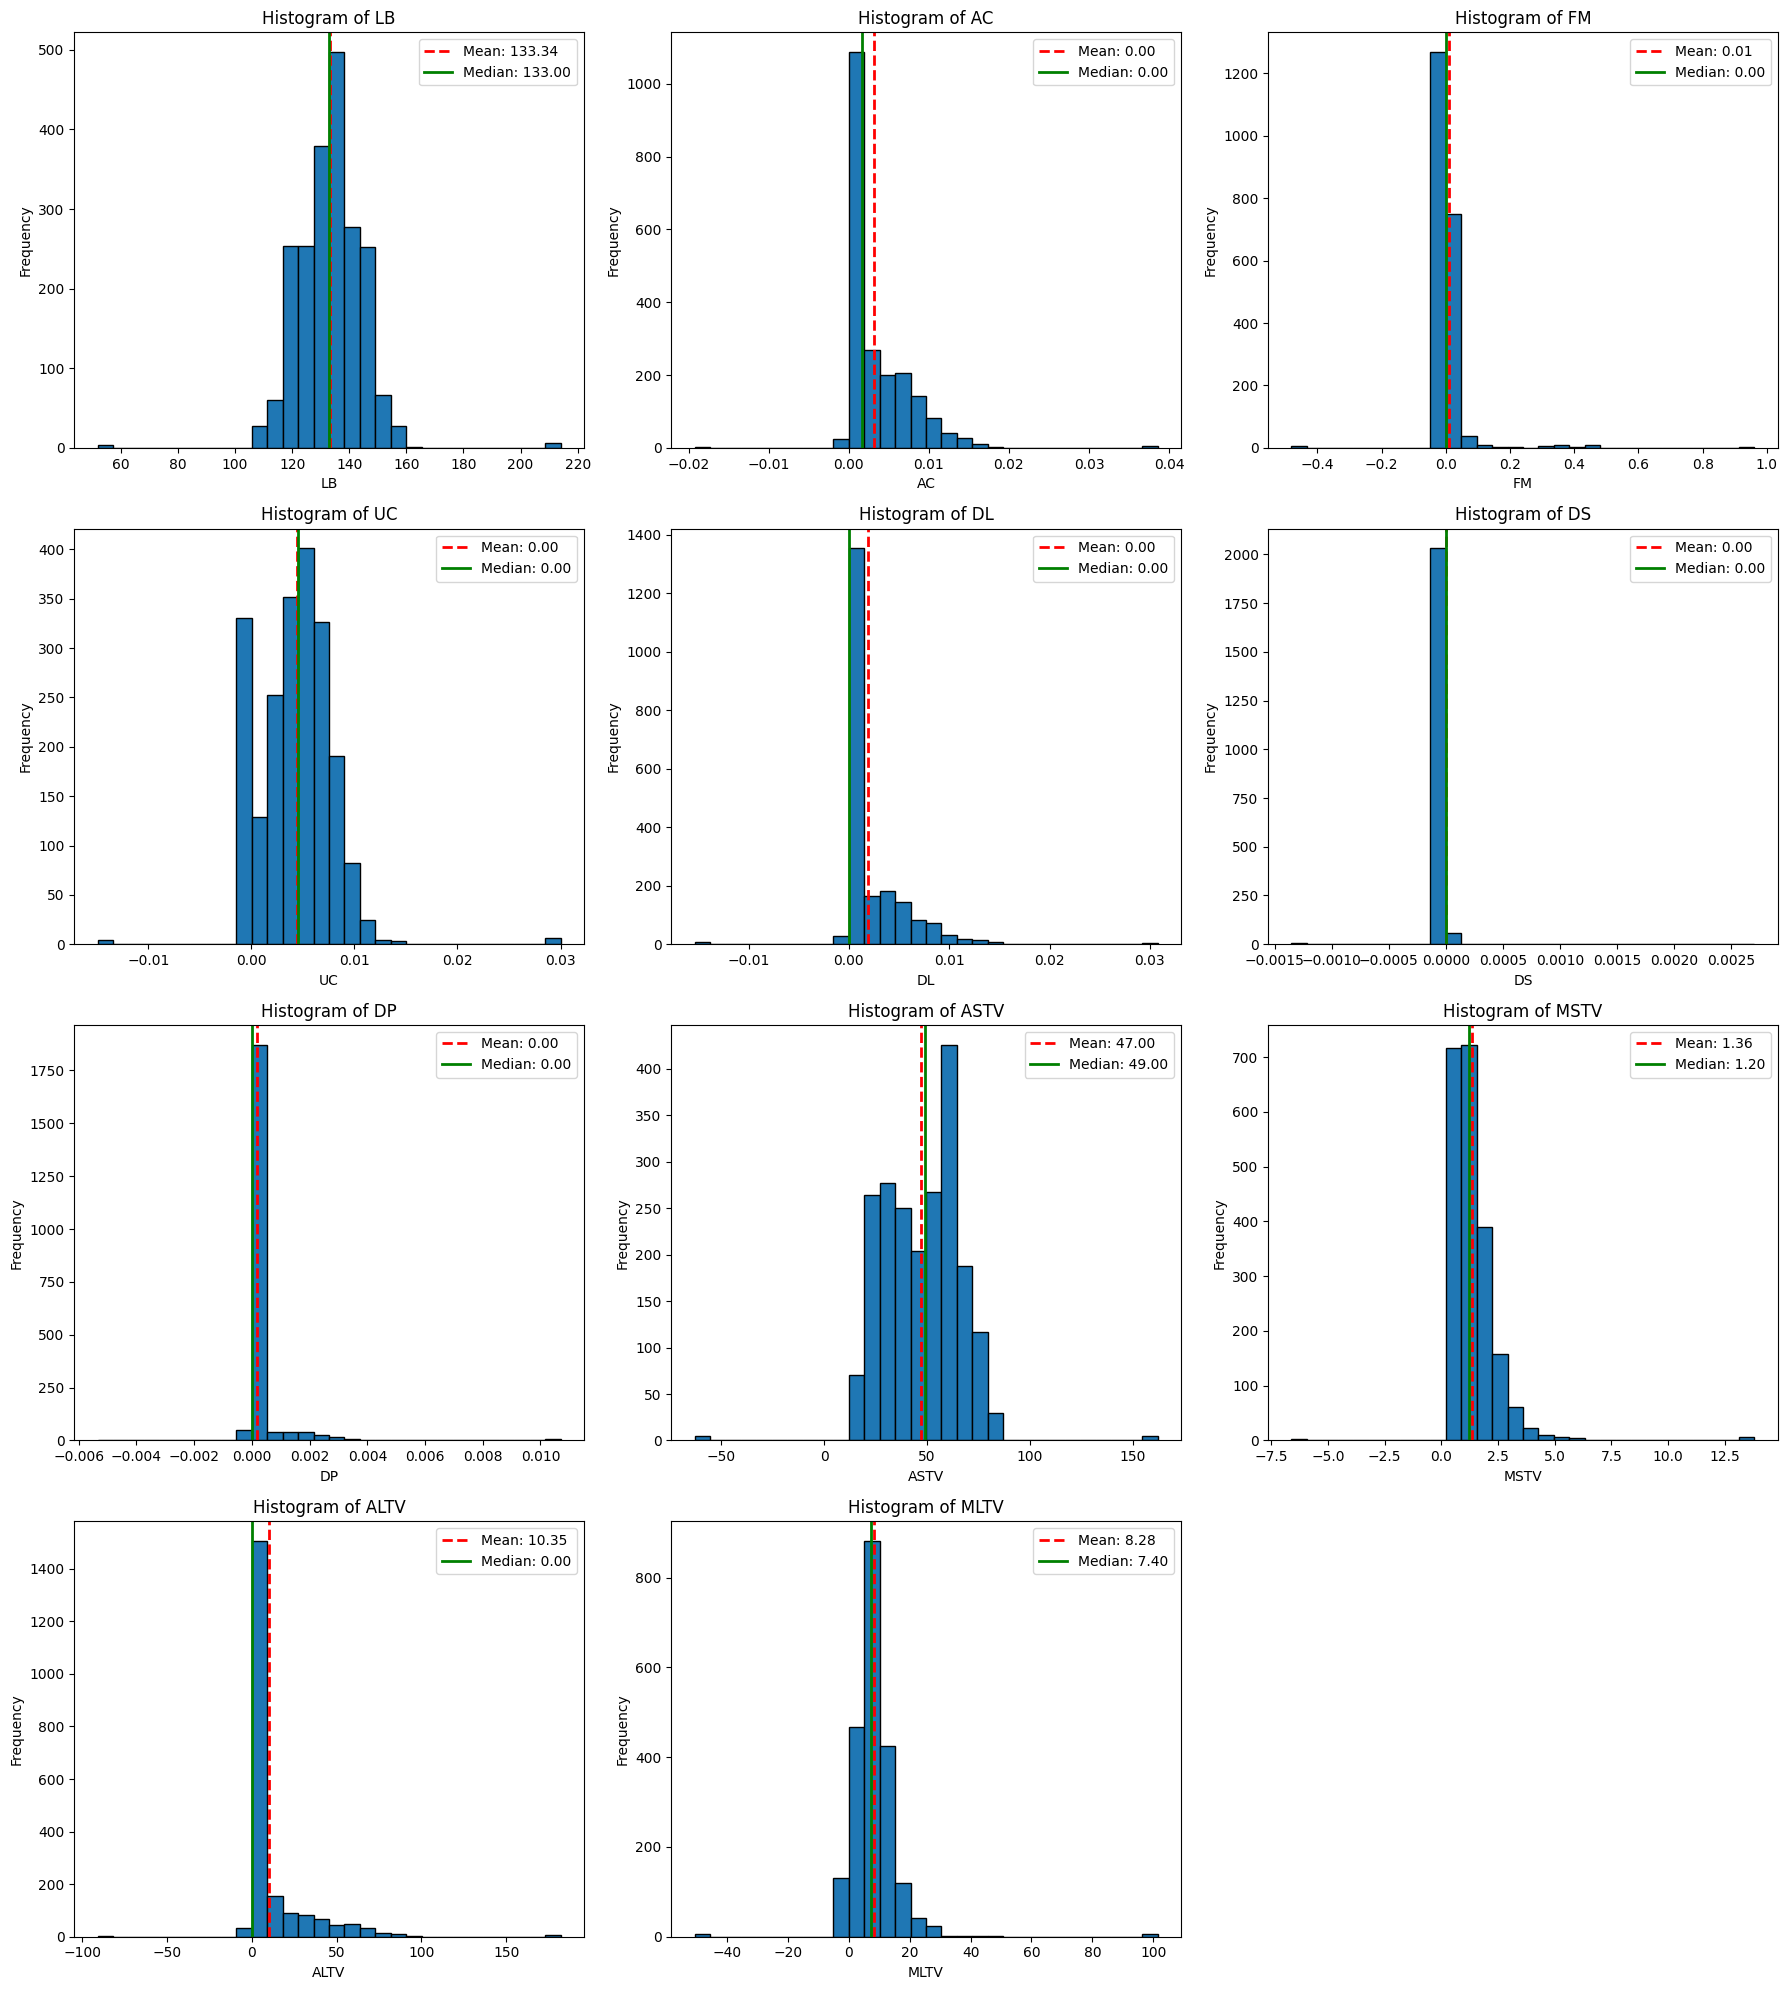

In [ ]:
# Column names in the dataset
columns = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV']

# Set up the figure
plt.figure(figsize=(18, 20))

# Loop through each column and create a histogram with mean and median lines
for i, col in enumerate(columns):
    # Create a subplot in a 4x3 grid
    plt.subplot(4, 3, i + 1)

    # Plot the histogram for the current column
    plt.hist(cd_cleaned2[col], bins=30, edgecolor='black')

    # Calculate mean and median
    mean = cd_cleaned2[col].mean()
    median = cd_cleaned2[col].median()

    # Add mean and median lines
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='solid', linewidth=2, label=f'Median: {median:.2f}')

    # Add title, labels, and legend
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the figure
plt.show()


**Scatter Plot**

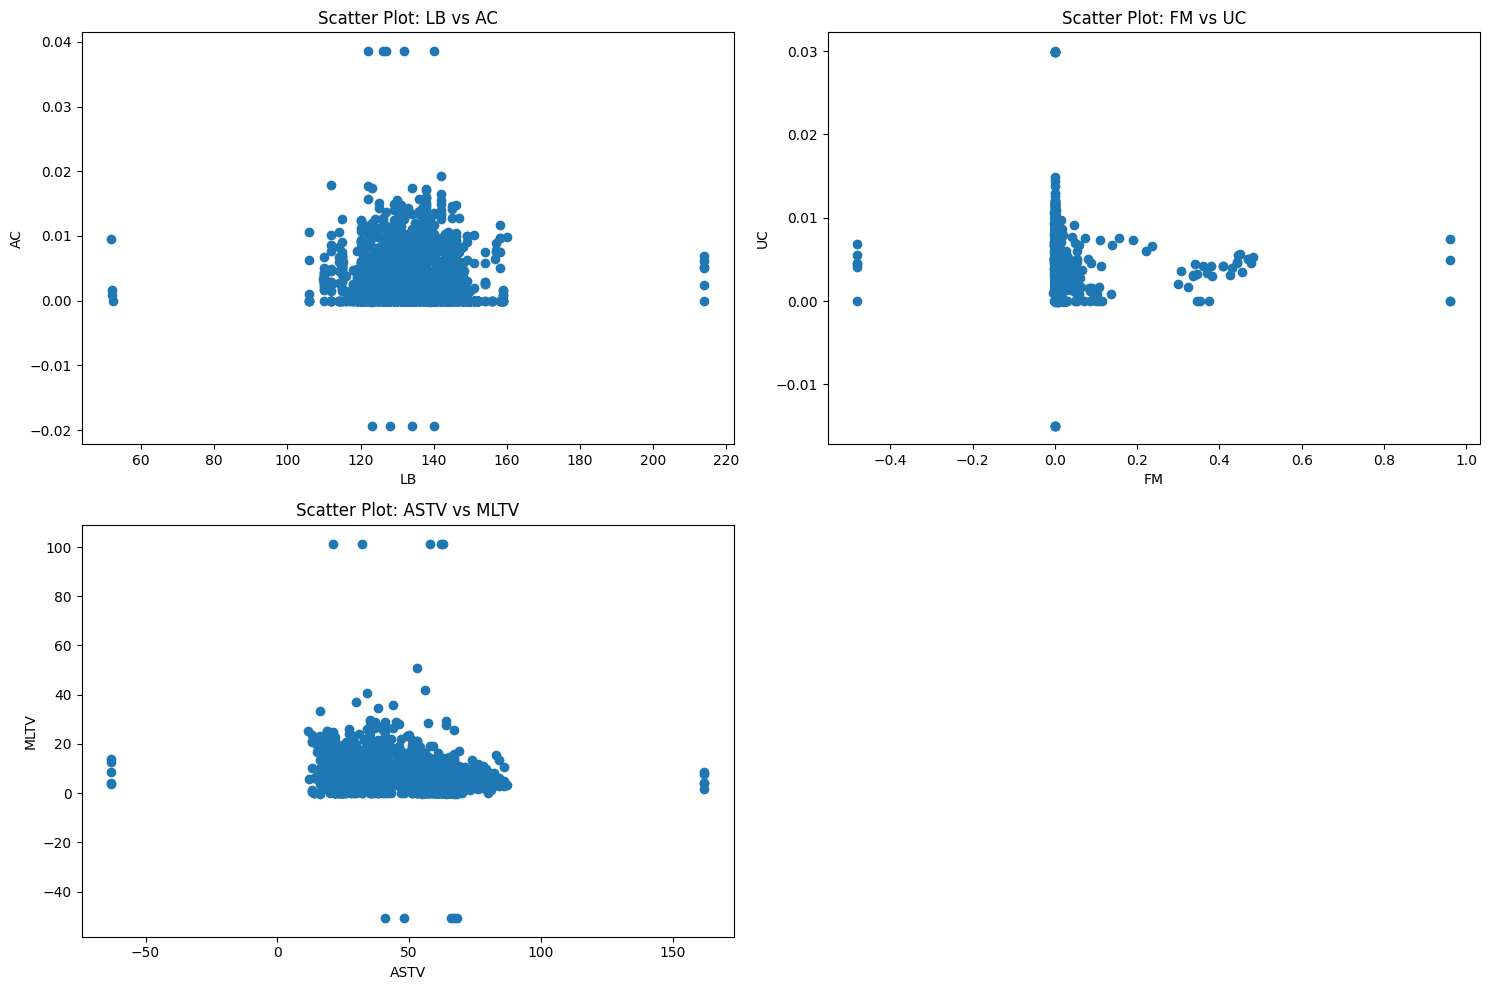

In [ ]:
# List of variable pairs to plot (you can modify this list)
variable_pairs = [
    ('LB', 'AC'),
    ('FM', 'UC'),
    ('ASTV', 'MLTV')
]

# Set up the figure
plt.figure(figsize=(15, 10))

# Loop through the variable pairs and create scatter plots
for i, (var1, var2) in enumerate(variable_pairs):
    plt.subplot(2, 2, i + 1)
    plt.scatter(cd_cleaned[var1],cd_cleaned[var2])
    plt.title(f'Scatter Plot: {var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


**Pair Plot**

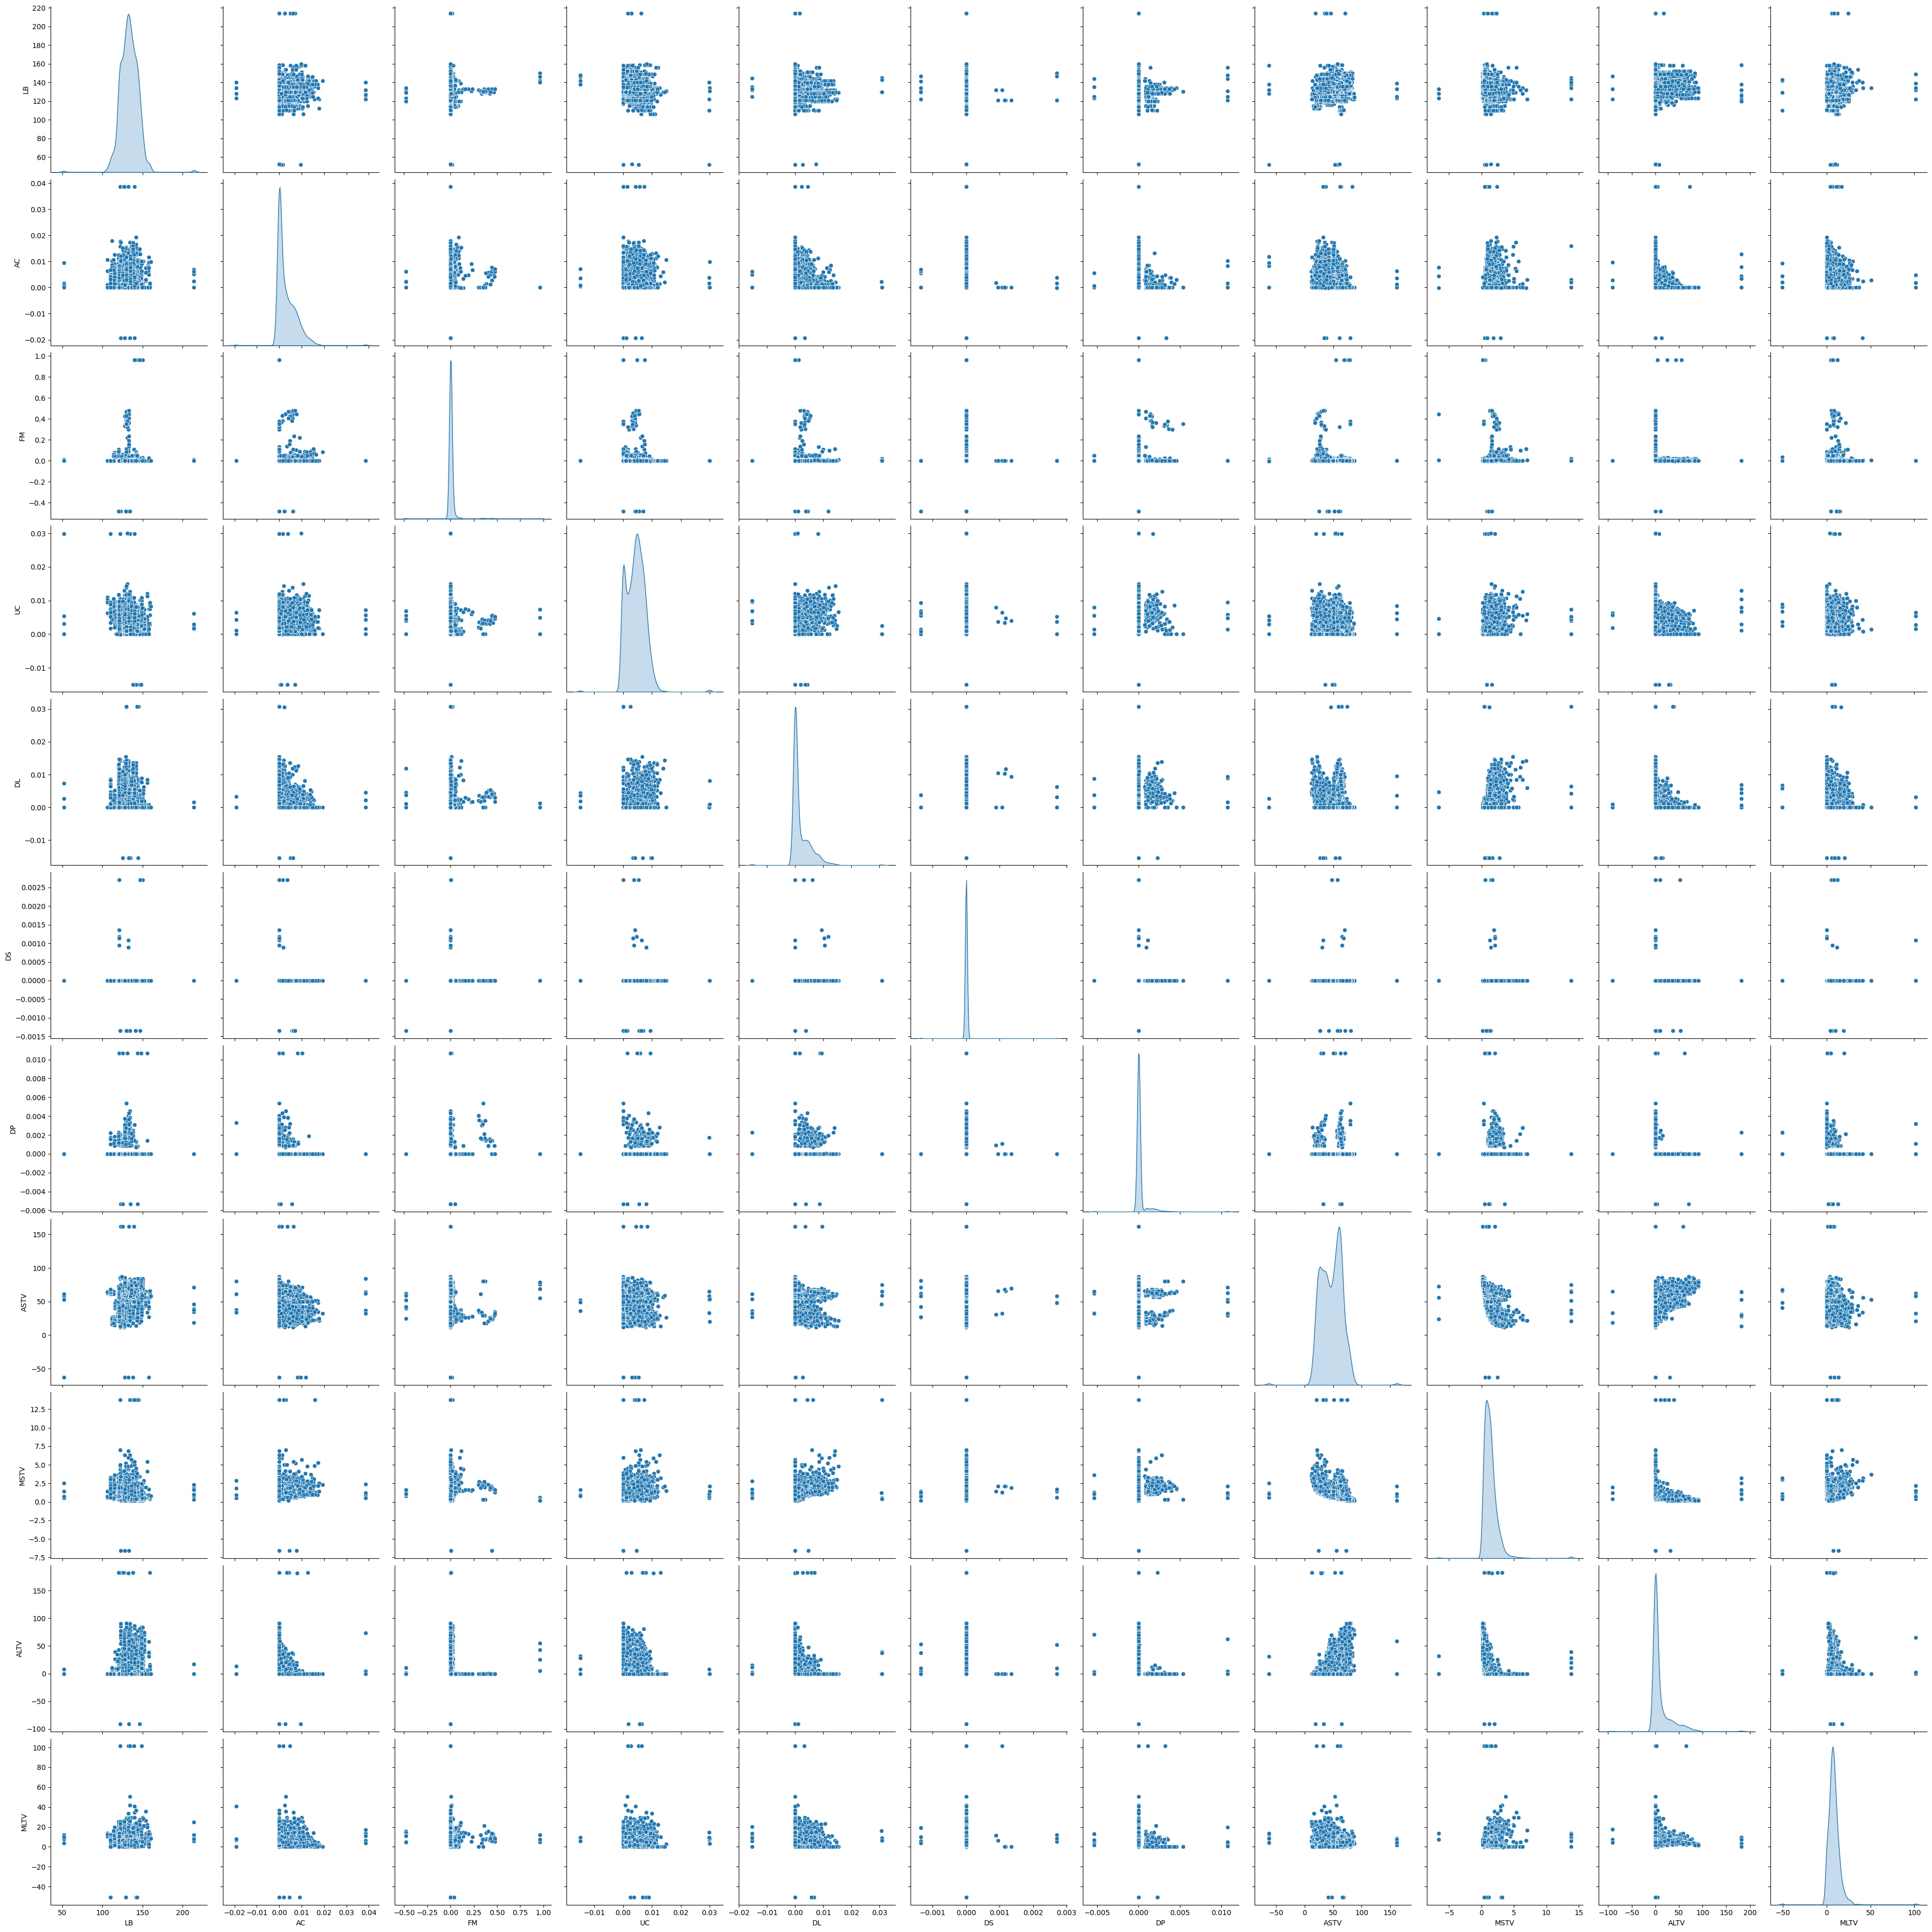

In [ ]:
sns.pairplot(cd_cleaned2,diag_kind='kde',height=3.5)

# 4.	Pattern Recognition and Insights:

In [ ]:
correlation_matrix=cd_cleaned2.corr()
correlation_matrix

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV
LB,1.000000,-0.063830,0.018777,-0.166570,-0.126959,-0.005438,-0.047724,0.242625,-0.170473,0.210728,-0.003457
AC,-0.063830,1.000000,0.010152,0.070135,-0.095491,-0.033623,-0.084590,-0.230487,0.126752,-0.273890,-0.106529
FM,0.018777,0.010152,1.000000,-0.052979,0.009830,0.029901,0.121284,-0.032783,0.017481,-0.012276,-0.006237
UC,-0.166570,0.070135,-0.052979,1.000000,0.191864,-0.006937,0.070658,-0.181133,0.190011,-0.227817,-0.049460
DL,-0.126959,-0.095491,0.009830,0.191864,1.000000,0.058625,0.145425,-0.070792,0.410155,-0.186571,-0.165750
DS,-0.005438,-0.033623,0.029901,-0.006937,0.058625,1.000000,0.004285,0.008452,0.016163,-0.004398,0.034349
DP,-0.047724,-0.084590,0.121284,0.070658,0.145425,0.004285,1.000000,0.038238,0.119892,-0.077758,-0.114084
ASTV,0.242625,-0.230487,-0.032783,-0.181133,-0.070792,0.008452,0.038238,1.000000,-0.293388,0.357668,-0.220427
MSTV,-0.170473,0.126752,0.017481,0.190011,0.410155,0.016163,0.119892,-0.293388,1.000000,-0.291362,0.028934
ALTV,0.210728,-0.273890,-0.012276,-0.227817,-0.186571,-0.004398,-0.077758,0.357668,-0.291362,1.000000,-0.107712


ASTV and NSP (0.422652)

Implication- A moderate positive correlation suggests that as ASTV increases, NSP also tends to increase. This might indicate that changes in ASTV could have a positive effect on NSP.

MSTV and Width (0.435393)

Implication- This positive correlation suggests that MSTV and Width tend to increase together.

DL and ASTV (-0.070792)

Implication- A very low negative correlation suggests that changes in DL have a negligible effect on ASTV. This means there's minimal evidence of a linear relationship between these variables.

# 5.	Conclusion:

The exploratory data analysis of the cardiotocographic dataset uncovered important insights into fetal heart rate (FHR) and uterine contraction parameters. The data showed variability across features like LB (Baseline FHR) and FM (Fetal Movements), with outliers in some columns that were treated carefully to maintain data integrity. The correlation heatmap highlighted some relationships, such as between ASTV (Abnormal Short-Term Variability) and MSTV (Mean Short-Term Variability), suggesting patterns that may aid in further medical analysis.

Future Scope:

Predictive Modeling: The dataset could be used to build machine learning models to predict fetal health outcomes.

Feature Engineering: Further work can be done to engineer new features from the given parameters to improve model accuracy.

Deeper Medical Insights: Collaboration with medical experts may help interpret the variability in the features and how they relate to fetal health.

This analysis provides a strong foundation for more complex modeling and medical studies.